<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/Deep_Learning/Example_Keras_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
# Instantiating a small convnet
inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# For conv2d layers, 
# param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)
# For Dense layers,
# param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32")/255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32")/255

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 52s 54ms/step - loss: 0.1594 - accuracy: 0.9507
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0443 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 48s 52ms/step - loss: 0.0228 - accuracy: 0.9934
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0290 - accuracy: 0.9919
Test accuracy: 0.992


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"czyhust","key":"2e994aeee7f639bc6dd6e1749a0b8b09"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Model for the Kaggle Dogs vs. Cats dataset
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:05<00:00, 140MB/s]
100% 812M/812M [00:05<00:00, 164MB/s]


In [7]:
!unzip -qq dogs-vs-cats.zip

In [8]:
!unzip -qq train.zip

In [9]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
# Building the cats vs. dogs classification model
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(loss="binary_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [10]:
# Data preprocessing
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(new_base_dir / "train",
                                             image_size=(180, 180),
                                             batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation",
                                             image_size=(180, 180),
                                             batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test",
                                             image_size=(180, 180),
                                             batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape: ", data_batch.shape)
  print("labels batch shape: ", labels_batch.shape)
  break

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.keras",
    save_best_only=True,
    monitor="val_loss"
)]

In [ ]:
history = model.fit(train_dataset, epochs=30,
                    validation_data=validation_dataset,
                    callbacks=callbacks, verbose=0)

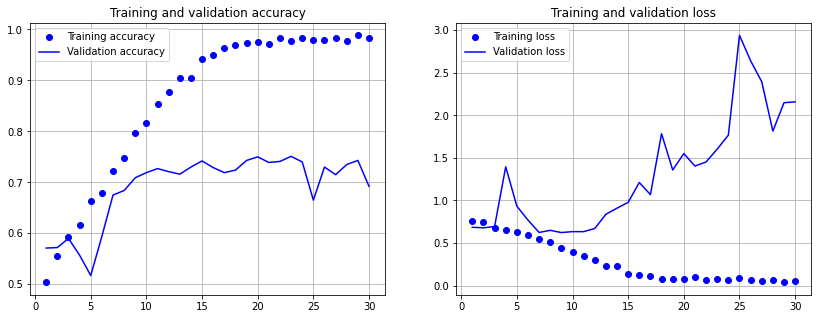

In [ ]:
import matplotlib.pyplot as plt

def plot_results(history):
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy)+1)

  fig, axs = plt.subplots(1,2,figsize=(14,5))
  axs[0].plot(epochs, accuracy, "bo", label="Training accuracy")
  axs[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
  axs[0].set_title("Training and validation accuracy")
  axs[0].legend()
  axs[0].grid()
  axs[1].plot(epochs, loss, "bo", label="Training loss")
  axs[1].plot(epochs, val_loss, "b", label="Validation loss")
  axs[1].set_title("Training and validation loss")
  axs[1].legend()
  axs[1].grid()
  fig.show()

plot_results(history)

In [ ]:
# Evaluating the model on the test set
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 52ms/step - loss: 0.6256 - accuracy: 0.6985
Test accuracy: 0.698


In [ ]:
# Using data augmentation
data_augmentation = keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.2)
    ]
)

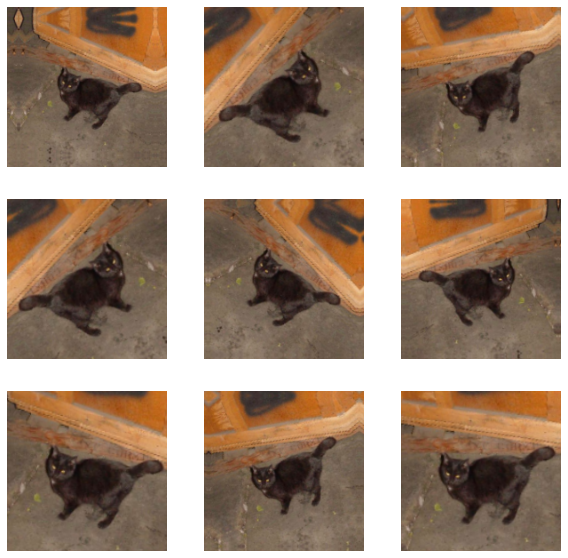

In [ ]:
# sample
plt.figure(figsize=(10,10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images, training=True)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
# Defining a new convnet that includes image augmentation and dropout
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs, training=True) # 3 augmentation layers added before the 1st convnet layer
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])

callbacks = [
             keras.callbacks.ModelCheckpoint(
                 filepath="convnet_from_scratch_with_augmentation.keras",
                 save_best_only=True,
                 monitor="val_loss"
             )
]

history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset,
                    callbacks=callbacks)

In [13]:
 def plot_results(history):
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy)+1)

  fig, axs = plt.subplots(1,2,figsize=(14,5))
  axs[0].plot(epochs, accuracy, "bo", label="Training accuracy")
  axs[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
  axs[0].set_title("Training and validation accuracy")
  axs[0].legend()
  axs[0].grid()
  axs[1].plot(epochs, loss, "bo", label="Training loss")
  axs[1].plot(epochs, val_loss, "b", label="Validation loss")
  axs[1].set_title("Training and validation loss")
  axs[1].legend()
  axs[1].grid()
  fig.show()

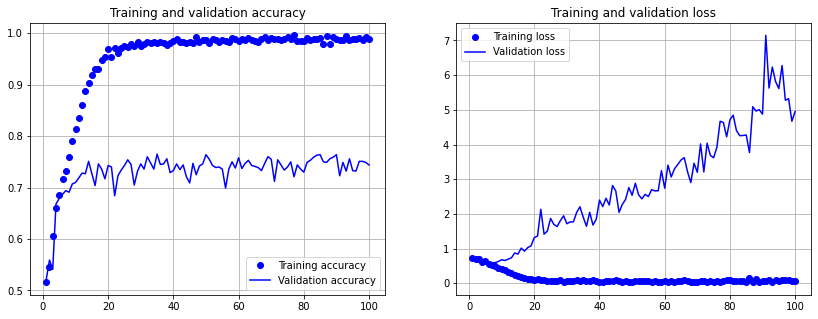

In [ ]:
plot_results(history)

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 35ms/step - loss: 0.6200 - accuracy: 0.6755
Test accuracy: 0.675


In [2]:
# Reusing pretrained models
# instantiating the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet", include_top=False, input_shape=(180,180,3)
)
conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [11]:
# Approach 1: fast feature extraction without data augmentation
# Extracting the VGG16 features and corresponding labels
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [12]:
train_features.shape

(2000, 5, 5, 512)

In [14]:
# Defining and training the densely connected classifier
inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction.keras",
    save_best_only=True,
    monitor="val_loss"
)]
history = model.fit(train_features, train_labels, epochs=20, 
                    validation_data=(val_features, val_labels),
                    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 11ms/step - loss: 16.2172 - accuracy: 0.9270 - val_loss: 3.6237 - val_accuracy: 0.9750
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 3.1511 - accuracy: 0.9765 - val_loss: 4.4429 - val_accuracy: 0.9700
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 2.4579 - accuracy: 0.9815 - val_loss: 11.7173 - val_accuracy: 0.9550
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.4868 - accuracy: 0.9920 - val_loss: 4.8665 - val_accuracy: 0.9650
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6830 - accuracy: 0.9940 - val_loss: 5.0849 - val_accuracy: 0.9650
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5227 - accuracy: 0.9940 - val_loss: 5.5874 - val_accuracy: 0.9700
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5265 - accuracy: 0.9950 - val_loss: 5.7168 - val_accuracy: 0.9730
Epoch 8/20
63/63 

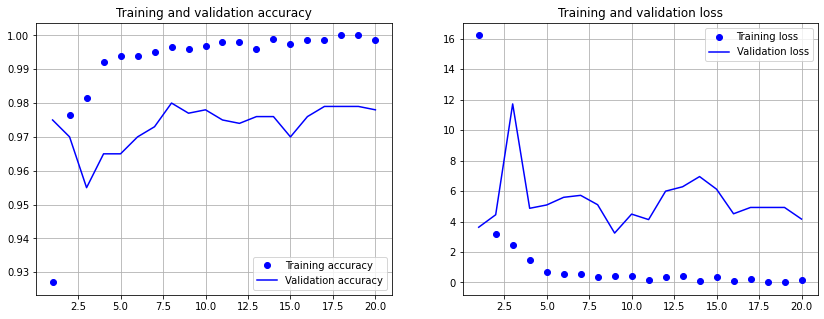

In [15]:
plot_results(history)

In [16]:
# Feature extraction together with data augmentation
conv_base = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False)
conv_base.trainable = True
print("This is the number of trainable weights before freezing the conv base: ",
      len(conv_base.trainable_weights))
conv_base.trainable = False
print("This is the number of trainable weights after freezing the conv base: ",
      len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base:  26
This is the number of trainable weights after freezing the conv base:  0


In [20]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.2)
    ]
)
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs, training=True)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.keras",
    save_best_only=True,
    monitor="val_loss"
)]
history = model.fit(train_dataset, epochs=50, 
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 12s 174ms/step - loss: 21.8313 - accuracy: 0.8980 - val_loss: 18.2802 - val_accuracy: 0.8900
Epoch 2/50
63/63 [==============================] - 11s 171ms/step - loss: 7.4167 - accuracy: 0.9470 - val_loss: 6.7401 - val_accuracy: 0.9530
Epoch 3/50
63/63 [==============================] - 11s 171ms/step - loss: 6.2915 - accuracy: 0.9515 - val_loss: 5.3497 - val_accuracy: 0.9590
Epoch 4/50
63/63 [==============================] - 11s 169ms/step - loss: 5.9741 - accuracy: 0.9590 - val_loss: 6.3374 - val_accuracy: 0.9510
Epoch 5/50
63/63 [==============================] - 11s 168ms/step - loss: 5.3880 - accuracy: 0.9605 - val_loss: 5.9646 - val_accuracy: 0.9560
Epoch 6/50
63/63 [==============================] - 11s 169ms/step - loss: 5.3640 - accuracy: 0.9615 - val_loss: 6.1080 - val_accuracy: 0.9650
Epoch 7/50
63/63 [==============================] - 11s 173ms/step - loss: 3.7108 - accuracy: 0.9700 - val_loss: 4.7580 - val_accuracy: 0.96

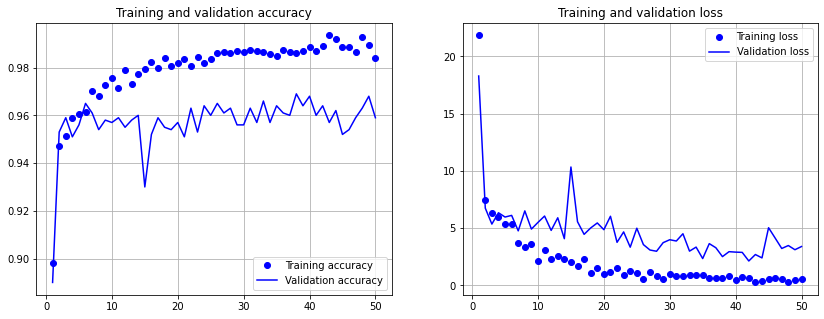

In [21]:
plot_results(history)

In [22]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 108ms/step - loss: 3.4067 - accuracy: 0.9590
Test accuracy: 0.959
